# 시바견과 진돗개 구분하기 2

Augmentation을 통해 training data를 늘렸다. 총 데이터는 기존 400여장에서 1900장으로 증대시켰다. 바로 시작해보자!

# 필요한 모듈먼저 부르기

In [85]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os
import tqdm
import random
from sklearn.datasets import load_files

# 다시 데이터 불러오기

In [91]:
X_dog = list()
# 네이버사진은 이상해서..
for fileName in os.listdir('./shiba'):
    if fileName.startswith('google') or fileName.startswith('aug'):
        X_dog.append(fileName)

In [92]:
len(X_dog)

915

In [93]:
for fileName in os.listdir('./진돗개2'):
    X_dog.append(fileName)

In [94]:
len(X_dog)

1865

시바견 : 1160 / 진돗개 : 950

In [96]:
n_shiba = 915
n_jindo = 950

# Category 만들기

시바견이면 [1,0]

진돗개면 [0,1]

In [97]:
shiba_labels = list(list([1,0] for _ in range(n_shiba)))
jindo_labels = list(list([0,1] for _ in range(n_jindo)))

In [98]:
len(shiba_labels), len(jindo_labels)

(915, 950)

In [99]:
labels = shiba_labels + jindo_labels

In [100]:
labels = labels

In [101]:
len(labels),labels[:3]

(1865, [[1, 0], [1, 0], [1, 0]])

# Image_resize

In [102]:
resize_dog = list()

for dog in X_dog[:n_shiba]:
    img = cv2.imread('./shiba/' + dog,cv2.IMREAD_GRAYSCALE)
    resize = cv2.resize(img,(224,224))
    resize = cv2.normalize(resize,resize,0,255,cv2.NORM_MINMAX)    
    resize_dog.append(resize)

In [103]:
len(resize_dog)

915

In [104]:
for i in X_dog[n_shiba:]:
    img = cv2.imread('./진돗개2/'+i,cv2.IMREAD_GRAYSCALE)
    resize = cv2.resize(img,(224,224))
    resize = cv2.normalize(resize,resize,0,255,cv2.NORM_MINMAX)
    resize_dog.append(resize)

In [105]:
len(resize_dog)

1865

[1, 0]


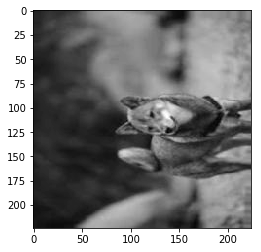

In [106]:
# 잘 됐는지 임의로 하나 출력해보자. 
plt.imshow(resize_dog[2],cmap=plt.cm.gray)
print(labels[1])
plt.show()

In [107]:
# data shuffle

np.random.seed(42)
tmp = [[x,y] for x, y in zip(resize_dog, labels)]
random.shuffle(tmp)
X_sample = [n[0] for n in tmp]
y_sample = [n[1] for n in tmp]

In [108]:
# Train / Test Split
# 80 : 20
train_size = np.ceil(0.8 * len(resize_dog)).astype(int) # 381 / 나머지 95개 test 할당

X_train = X_sample[:train_size]
y_train = y_sample[:train_size]

X_test = X_sample[train_size:]
y_test = y_sample[train_size:]



In [109]:
from keras_preprocessing.image import img_to_array

In [110]:

X_train = img_to_array(X_train)
y_train = np.array(y_train)

X_test = img_to_array(X_test)
y_test = np.array(y_test)

In [111]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1492, 1492, 373, 373)

[1 0]


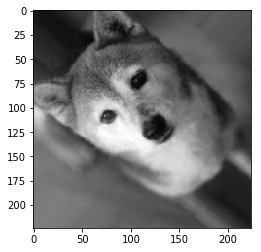

In [112]:
plt.imshow(X_test[1],cmap=plt.cm.gray)
print(y_test[1])
plt.show()

# Network 구축하기 

by Keras

In [113]:
IMG_SIZE = 224
# (None,224,224,1) 형태로 reshape
X_train = X_train.reshape(X_train.shape[0],IMG_SIZE,IMG_SIZE,1)
X_test = X_test.reshape(X_test.shape[0],IMG_SIZE,IMG_SIZE,1)

In [114]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense

In [115]:
IMG_SIZE = 224
def Network(name):
    
    name.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    name.add(MaxPooling2D(pool_size=(2,2)))
    name.add(BatchNormalization())
    name.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    name.add(MaxPooling2D(pool_size=(2,2)))
    name.add(BatchNormalization())
    name.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    name.add(MaxPooling2D(pool_size=(2,2)))
    name.add(BatchNormalization())
    name.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    name.add(MaxPooling2D(pool_size=(2,2)))
    name.add(BatchNormalization())
    name.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    name.add(MaxPooling2D(pool_size=(2,2)))
    name.add(BatchNormalization())
    name.add(Dropout(0.7))
    name.add(Flatten())
    name.add(Dense(128, activation='relu'))
    name.add(Dropout(0.7))
    name.add(Dense(2, activation = 'softmax'))

In [116]:
model1 = models.Sequential()
model2 = models.Sequential()
Network(model1)
Network(model2)

In [117]:
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [118]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model_sgd = models.Sequential()
Network(model_sgd)
model_sgd.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# RmsProp

with Validation 20%

In [34]:
model1.fit(np.array(X_train),np.array(y_train),epochs=15,batch_size=20,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1523 samples, validate on 381 samples
Epoch 1/15
1523/1523 [==============================] - 140s 92ms/step - loss: 0.8953 - acc: 0.6244 - val_loss: 0.8963 - val_acc: 0.6115
Epoch 2/15
1523/1523 [==============================] - 136s 89ms/step - loss: 0.7116 - acc: 0.6947 - val_loss: 0.7145 - val_acc: 0.6798
Epoch 3/15
1523/1523 [==============================] - 122s 80ms/step - loss: 0.5731 - acc: 0.7452 - val_loss: 0.5758 - val_acc: 0.7743
Epoch 4/15
1523/1523 [==============================] - 141s 92ms/step - loss: 0.4877 - acc: 0.7807 - val_loss: 2.9425 - val_acc: 0.5144
Epoch 5/15
1523/1523 [==============================] - 136s 89ms/step - loss: 0.3943 - acc: 0.8181 - val_loss: 0.7155 - val_acc: 0.6955
Epoch 6/15
1523/1523 [==============================] - 137s 90ms/step - loss: 0.3462 - acc: 0.8391 - val_loss: 0.7925 - val_acc: 0.6667
Epoch 7/15
1523/1523 [==============================] - 156s 103ms/step - loss: 0.2

In [35]:
# optimizer : RmsProp / epochs : 15 / batch_size = 20
# network는 동일 
loss, acc = model1.evaluate(X_test,y_test,verbose=0)
print("Accuracy : %0.2f" % (acc*100))

Accuracy : 68.84


In [37]:
model2.fit(np.array(X_train),np.array(y_train),epochs=15,batch_size=20,verbose=1,validation_split=0.2)

Train on 1523 samples, validate on 381 samples
Epoch 1/15
1523/1523 [==============================] - 178s 117ms/step - loss: 0.9164 - acc: 0.5962 - val_loss: 0.6462 - val_acc: 0.7008
Epoch 2/15
1523/1523 [==============================] - 145s 95ms/step - loss: 0.6750 - acc: 0.6829 - val_loss: 0.5801 - val_acc: 0.7454
Epoch 3/15
1523/1523 [==============================] - 134s 88ms/step - loss: 0.5287 - acc: 0.7492 - val_loss: 0.5271 - val_acc: 0.7402
Epoch 4/15
1523/1523 [==============================] - 145s 95ms/step - loss: 0.4682 - acc: 0.7919 - val_loss: 0.7658 - val_acc: 0.6693
Epoch 5/15
1523/1523 [==============================] - 143s 94ms/step - loss: 0.3713 - acc: 0.8365 - val_loss: 0.5950 - val_acc: 0.7165
Epoch 6/15
1523/1523 [==============================] - 141s 93ms/step - loss: 0.3092 - acc: 0.8726 - val_loss: 0.8424 - val_acc: 0.6588
Epoch 7/15
1523/1523 [==============================] - 142s 94ms/step - loss: 0.2519 - acc: 0.9002 - val_loss: 0.5510 - val_acc: 

In [38]:
# optimizer : Adam / Dropout = 0.3 추가 / epochs : 15 / batch_size = 20
# network는 동일 
loss, acc = model2.evaluate(X_test,y_test,verbose=0)
print("Accuracy : %0.2f" % (acc*100))

Accuracy : 73.05


# Epoch : 50 / Batch_size : 32

In [216]:
model2.fit(X_train,ytrain,epochs=50,batch_size=32,verbose=1,validation_split=0.2)

Train on 1523 samples, validate on 381 samples
Epoch 1/50
1523/1523 [==============================] - 147s 97ms/step - loss: 0.9987 - acc: 0.6054 - val_loss: 0.8528 - val_acc: 0.6378
Epoch 2/50
1523/1523 [==============================] - 138s 91ms/step - loss: 0.6692 - acc: 0.7170 - val_loss: 0.7924 - val_acc: 0.6509
Epoch 3/50
1523/1523 [==============================] - 142s 93ms/step - loss: 0.6221 - acc: 0.7393 - val_loss: 0.7480 - val_acc: 0.6719
Epoch 4/50
1523/1523 [==============================] - 137s 90ms/step - loss: 0.5141 - acc: 0.7781 - val_loss: 0.7243 - val_acc: 0.6457
Epoch 5/50
1523/1523 [==============================] - 137s 90ms/step - loss: 0.4013 - acc: 0.8109 - val_loss: 4.6020 - val_acc: 0.5302
Epoch 6/50
1523/1523 [==============================] - 153s 100ms/step - loss: 0.3376 - acc: 0.8444 - val_loss: 1.0602 - val_acc: 0.6693
Epoch 7/50
1523/1523 [==============================] - 155s 101ms/step - loss: 0.3086 - acc: 0.8785 - val_loss: 1.6580 - val_acc:

In [219]:
# 모델 가중치 저장 
model2.save_weights("epoch50")
# 불러올때는 model.load_weights(filename)

In [430]:
model2.save('epoch50_Adam')

In [431]:
from keras.models import load_model
model3 = load_model("epoch50_Adam")

In [217]:
# optimizer : Adam / Dropout = 0.3 추가 / epochs : 15 / batch_size = 20
# network는 동일 
loss, acc = model2.evaluate(X_test,y_test,verbose=0)
print("Accuracy : %0.2f" % (acc*100))

Accuracy : 80.00


Epochs를 50까지 늘려서 더 좋은 결과를 얻었다. 100으로 늘리는 것도 확인해보자. 여기서 부터는 모델을 저장하고 train하자.

tanh 로 시도해보기 

In [439]:
model_adam = load_model("epoch50_Adam")

In [441]:
model_adam.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1,validation_split=0.2)

Train on 1523 samples, validate on 381 samples
Epoch 1/50
1523/1523 [==============================] - 131s 86ms/step - loss: 1.0946 - acc: 0.5863 - val_loss: 0.6805 - val_acc: 0.6404
Epoch 2/50
1523/1523 [==============================] - 120s 79ms/step - loss: 0.7752 - acc: 0.6815 - val_loss: 0.6056 - val_acc: 0.6955
Epoch 3/50
1523/1523 [==============================] - 121s 80ms/step - loss: 0.5998 - acc: 0.7137 - val_loss: 0.8354 - val_acc: 0.5984
Epoch 4/50
1523/1523 [==============================] - 122s 80ms/step - loss: 0.5189 - acc: 0.7597 - val_loss: 0.8070 - val_acc: 0.6509
Epoch 5/50
1523/1523 [==============================] - 120s 79ms/step - loss: 0.4167 - acc: 0.8096 - val_loss: 0.6426 - val_acc: 0.7165
Epoch 6/50
1523/1523 [==============================] - 120s 79ms/step - loss: 0.3652 - acc: 0.8332 - val_loss: 0.4746 - val_acc: 0.7612
Epoch 7/50
1523/1523 [==============================] - 120s 79ms/step - loss: 0.3231 - acc: 0.8634 - val_loss: 0.8978 - val_acc: 0

In [442]:
loss, acc = model_adam.evaluate(X_test,y_test,verbose=0)
print("Accuracy : %0.2f" % (acc*100))

Accuracy : 55.79


학습을 더 시켰더니 오히려 더 Overfitting 되었다. 


# SGD

In [388]:
history_sgd = model_sgd.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1,validation_split=0.2)

Train on 1523 samples, validate on 381 samples
Epoch 1/50
1523/1523 [==============================] - 150s 98ms/step - loss: 1.0777 - acc: 0.5443 - val_loss: 0.8665 - val_acc: 0.5512
Epoch 2/50
1523/1523 [==============================] - 145s 95ms/step - loss: 0.8502 - acc: 0.5968 - val_loss: 0.6523 - val_acc: 0.6352
Epoch 3/50
1523/1523 [==============================] - 142s 93ms/step - loss: 0.7194 - acc: 0.6448 - val_loss: 0.6497 - val_acc: 0.6325
Epoch 4/50
1523/1523 [==============================] - 138s 91ms/step - loss: 0.6441 - acc: 0.6697 - val_loss: 0.6120 - val_acc: 0.6430
Epoch 5/50
1523/1523 [==============================] - 152s 100ms/step - loss: 0.5572 - acc: 0.7104 - val_loss: 0.6094 - val_acc: 0.6850
Epoch 6/50
1523/1523 [==============================] - 141s 93ms/step - loss: 0.5619 - acc: 0.7131 - val_loss: 0.5451 - val_acc: 0.7323
Epoch 7/50
1523/1523 [==============================] - 139s 91ms/step - loss: 0.4933 - acc: 0.7571 - val_loss: 0.7525 - val_acc: 

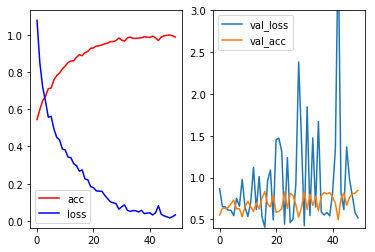

In [426]:
plt.subplot(1,2,1)
plt.plot(history_sgd.history['acc'], 'r-',label='acc')
plt.plot(history_sgd.history['loss'],'b-',label='loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_sgd.history['val_loss'],label='val_loss')
plt.plot(history_sgd.history['val_acc'],label='val_acc')
plt.ylim(0.4,3)
plt.legend()
plt.show()

In [427]:
# 너무 오버피팅이고...
loss, acc = model_sgd.evaluate(X_test,y_test,verbose=0)
print("Accuracy : %0.2f" % (acc*100))

Accuracy : 82.11


In [428]:
model_sgd.save('epoch50_sgd')

In [446]:
model_sgd100 = load_model('epoch50_sgd')

# Learning_rate와 Momentum 부여

In [ ]:
history_sgd = model_sgd.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1,validation_split=0.2,callba)

In [447]:
from keras import optimizers
model_sgd100.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=0.01, momentum=0.9), 
              metrics=['accuracy'])

In [448]:
history_sgd = model_sgd100.fit(X_train,y_train,epochs=10,batch_size=32,verbose=1,validation_split=0.2)

Train on 1523 samples, validate on 381 samples
Epoch 1/10
1523/1523 [==============================] - 126s 82ms/step - loss: 0.6034 - acc: 0.7636 - val_loss: 1.1948 - val_acc: 0.5223
Epoch 2/10
1523/1523 [==============================] - 144s 95ms/step - loss: 0.6231 - acc: 0.6901 - val_loss: 2.9465 - val_acc: 0.4698
Epoch 3/10
1523/1523 [==============================] - 150s 99ms/step - loss: 0.5205 - acc: 0.7564 - val_loss: 1.4854 - val_acc: 0.5302
Epoch 4/10
1523/1523 [==============================] - 150s 99ms/step - loss: 0.4385 - acc: 0.8017 - val_loss: 0.5003 - val_acc: 0.7717
Epoch 5/10
1523/1523 [==============================] - 156s 102ms/step - loss: 0.3444 - acc: 0.8503 - val_loss: 7.4998 - val_acc: 0.4724
Epoch 6/10
1523/1523 [==============================] - 119s 78ms/step - loss: 0.3378 - acc: 0.8595 - val_loss: 5.7280 - val_acc: 0.4724
Epoch 7/10
1523/1523 [==============================] - 117s 77ms/step - loss: 0.2470 - acc: 0.8871 - val_loss: 3.2933 - val_acc: 

In [449]:
loss, acc = model_sgd100.evaluate(X_test,y_test,verbose=0)
print("Accuracy : %0.2f" % (acc*100))

Accuracy : 73.89


Overfitting 된 모습... 학습이 아니라 데이터 전처리가 필요하다.

80%를 넘긴 모델 두 개를 저장해놨다. 그래도 높지 않은 acc기 때문에, 다음 3에서는 pretrained model(VGG16, inception-v3)을 이용할 것이다. 